<a href="https://colab.research.google.com/github/brianzhang9/Multivariate-time-series-forecasting-using-LSTM/blob/main/%E7%9A%AE%E5%B0%94%E9%80%8A%E7%9B%B8%E5%85%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


df = pd.read_csv('计算结果-滤波后-差分计算-相关性分析.csv')
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# 输出：使用 Pandas 计算皮尔逊相关结果的 r 值：0.2058774513561943


Pandas computed Pearson r: 0.9996018144183082


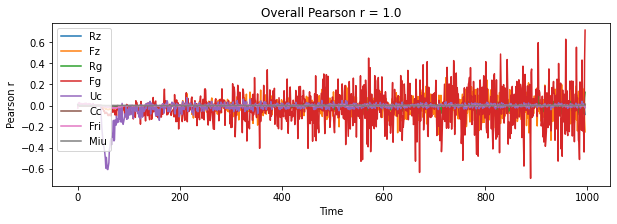

In [ ]:

# 计算滑动窗口同步性
f,ax=plt.subplots(figsize=(10,3))
df.rolling(window=1,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}")
plt.show()

Text(0.5, 0.98, 'Smiling data and rolling window correlation')

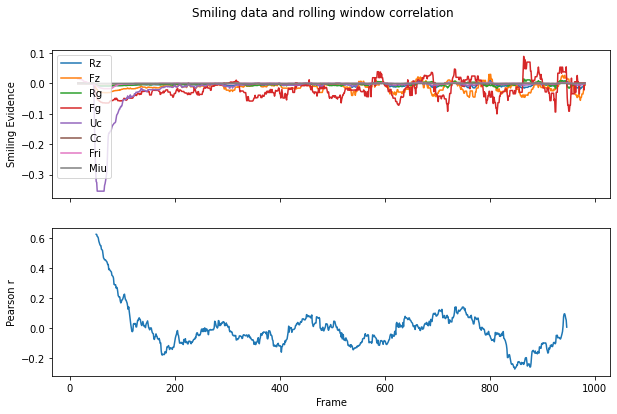

In [ ]:
# 设置窗口宽度，以计算滑动窗口同步性
r_window_size = 100
# 插入缺失值
df_interpolated = df.interpolate()
# 计算滑动窗口同步性
rolling_r = df_interpolated['Uc'].rolling(window=r_window_size, center=True).corr(df_interpolated['Cc'])
f,ax=plt.subplots(2,1,figsize=(10,6),sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")

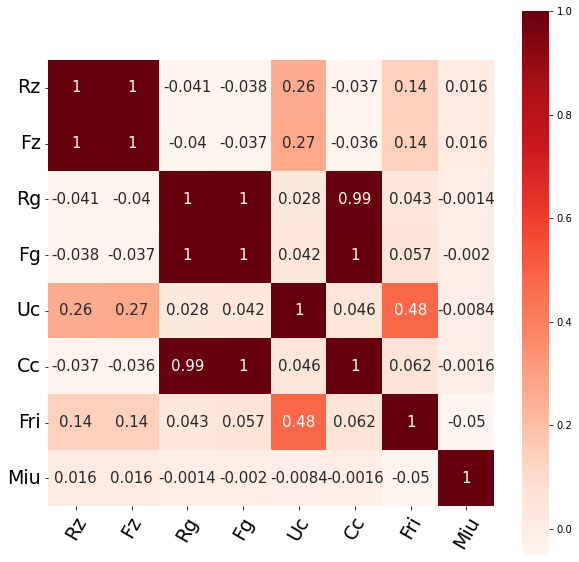

In [ ]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr('pearson'), annot=True, vmax=1, square=True, cmap="Reds",annot_kws={'size':15})
plt.xticks(rotation=60)    # 将字体进行旋转
plt.yticks(rotation=360)
plt.tick_params(labelsize=19)
plt.savefig('re.svg',format='svg',dpi=150)
plt.show()
